In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fetch data
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

# Load data into a DataFrame
boston_df = pd.read_csv(boston_url)

In [2]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


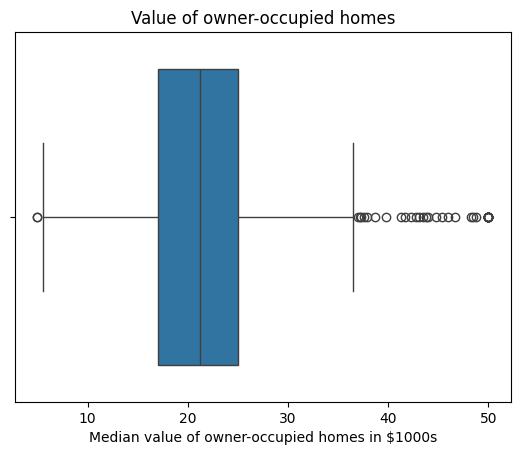

In [4]:
# Create a boxplot
ax = sns.boxplot(x="MEDV", data=boston_df)

# Set the title and x-label of the plot
pyplot.title("Value of owner-occupied homes")
pyplot.xlabel("Median value of owner-occupied homes in $1000s")

# Display the plot
pyplot.show()

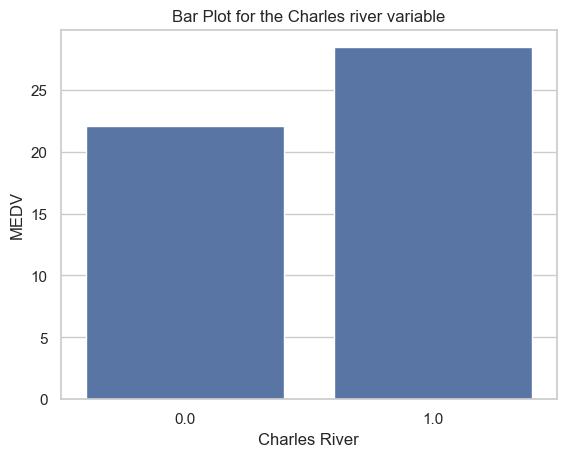

In [5]:
# Group the data by 'CHAS' and calculate the mean of 'MEDV'
river_data = boston_df.groupby("CHAS")[['MEDV']].mean()

# Set the style of the plot
sns.set(style="whitegrid")

# Create a barplot
ax = sns.barplot(x="CHAS", y='MEDV', data=river_data)

# Set the title and x-label of the plot
pyplot.title('Charles river variable')
pyplot.xlabel('Charles River')

# Display the plot
pyplot.show()

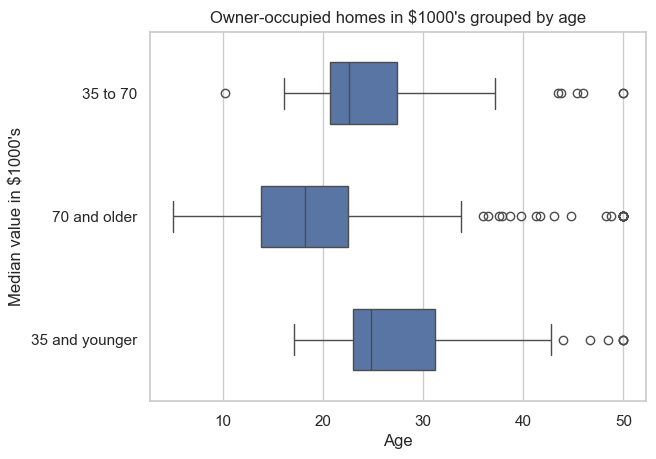

In [6]:
def groupping(i):
    if i['AGE'] <= 35:
        return '35 and younger'
    elif 35 < i['AGE'] < 70:
        return '35 to 70'
    elif i['AGE'] >= 70:
        return '70 and older'

# Apply the grouping function to the 'AGE' column
boston_df['Groups'] = boston_df.apply(groupping, axis=1)

# Create a boxplot
ax = sns.boxplot(x="MEDV", y="Groups", data=boston_df, width=0.5)

# Set the title, x-label, and y-label of the plot
pyplot.title("Owner-occupied homes in $1000's grouped by age")
pyplot.xlabel('Age')
pyplot.ylabel("Median value in $1000's")

# Display the plot
pyplot.show()

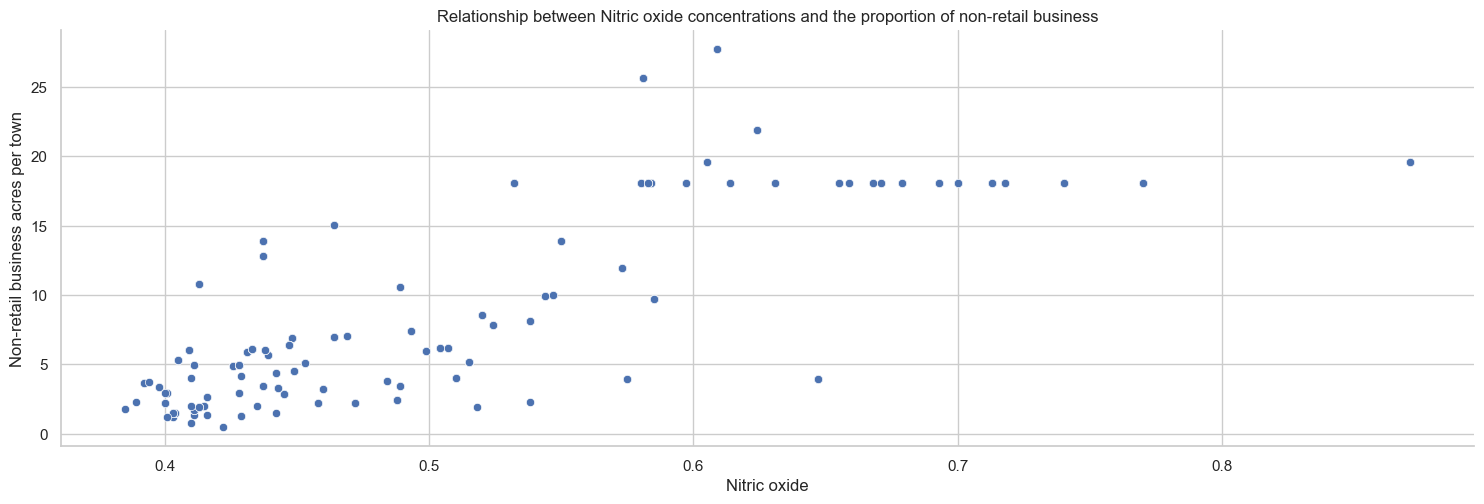

In [8]:
# Create a relational plot
sns.relplot(x="NOX", y="INDUS", data=boston_df, height=5, aspect=3)

# Set the title, x-label, and y-label of the plot
pyplot.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business')
pyplot.xlabel('Nitric oxide')
pyplot.ylabel('Non-retail business acres per town')

# Display the plot
pyplot.show()

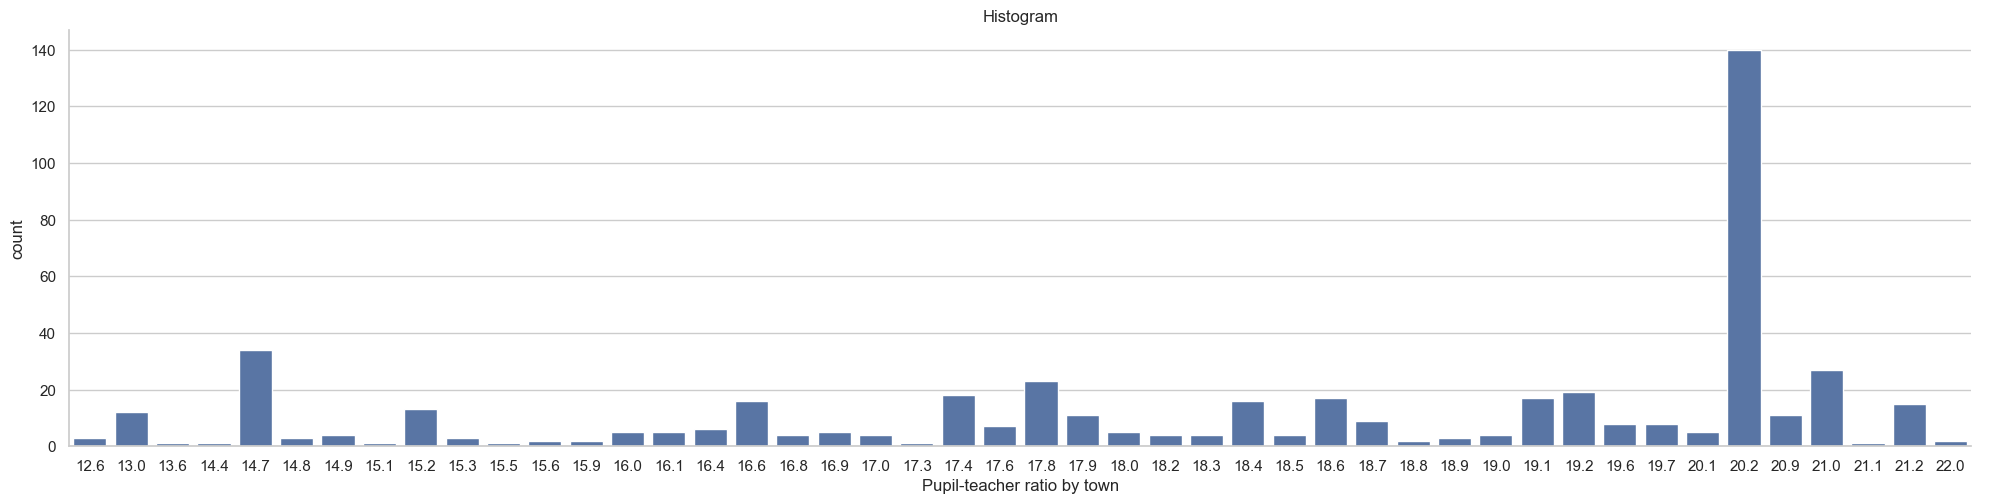

In [10]:
# Create a categorical plot
sns.catplot(x="PTRATIO", kind="count", data=boston_df, height=5, aspect=4)

# Set the title and x-label of the plot
pyplot.title("Histogram")
pyplot.xlabel("Pupil-teacher ratio by town")

# Display the plot
pyplot.show()

C:\Users\dudzi\AppData\Local\Temp\ipykernel_27200\2114128765.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['MEDV'],


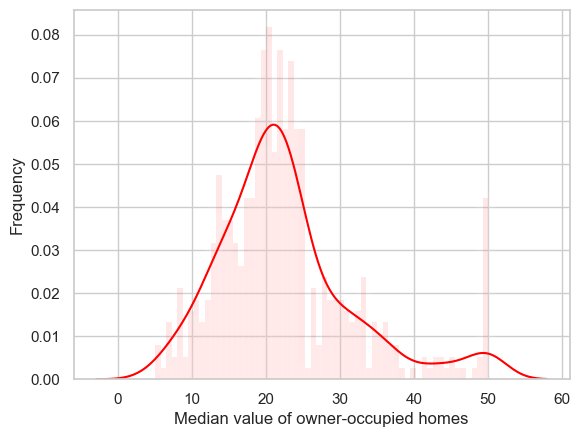

In [11]:
# Hypotheses
# H0: There is no difference in the median value of houses bounded by the Charles river
# H1: There is a difference in the median value of houses bounded by the Charles river

# Check if the data have normal distribution
ax = sns.distplot(boston_df['MEDV'],
                  bins=60,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 10, 'alpha':0.1})

# Set the x-label and y-label of the plot
ax.set(xlabel='Median value of owner-occupied homes', ylabel='Frequency')

# Display the plot
pyplot.show()

In [12]:
# Perform Levene's test for equal variances
levene_test = scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                                 boston_df[boston_df['CHAS'] == 1]['MEDV'], 
                                 center='median')

# Print the result of the test
print(f"Levene's test p-value: {levene_test.pvalue}")

# Interpret the result
if levene_test.pvalue < 0.05:
    print("Since the p-value is less than 0.05, we can assume variances are not equal.")
else:
    print("Since the p-value is greater than 0.05, we cannot assume variances are not equal.")

Levene's test p-value: 0.03263097600633006
Since the p-value is less than 0.05, we can assume variances are not equal.


In [13]:
# Perform independent t-test
t_test = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                               boston_df[boston_df['CHAS'] == 1]['MEDV'], 
                               equal_var=False)

# Print the result of the test
print(f"Independent t-test p-value: {t_test.pvalue}")

# Interpret the result
if t_test.pvalue < 0.05:
    print("Since the p-value is less than alpha value 0.05, we reject the null hypothesis.")
else:
    print("Since the p-value is greater than alpha value 0.05, we fail to reject the null hypothesis.")

Independent t-test p-value: 0.003567170098137517
Since the p-value is less than alpha value 0.05, we reject the null hypothesis.


In [14]:
# Hypotheses
# H0: The three population means are equal
# H1: At least one of the means differ

# Check if there is a difference between variances in each group
levene_test = scipy.stats.levene(boston_df[boston_df['Groups'] == '35 and younger']['MEDV'],
                                 boston_df[boston_df['Groups'] == '35 to 70']['MEDV'],
                                 boston_df[boston_df['Groups'] == '70 and older']['MEDV'], 
                                 center='median')

# Print the result of the test
print(f"Levene's test p-value: {levene_test.pvalue}")

# Interpret the result
if levene_test.pvalue < 0.05:
    print("Since the p-value is less than 0.05, we can assume variances are not equal.")
else:
    print("Since the p-value is greater than 0.05, we cannot assume variances are not equal.")

Levene's test p-value: 0.031806778061338456
Since the p-value is less than 0.05, we can assume variances are not equal.


In [15]:
# Define the groups
thirtyfive_lower = boston_df[boston_df['Groups'] == '35 and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['Groups'] == '35 to 70']['MEDV']
seventy_older = boston_df[boston_df['Groups'] == '70 and older']['MEDV']

# Perform one-way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)

# Print the result of the test
print(f"F_Statistic: {f_statistic}, P-Value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Since the p-value is less than 0.05, we can reject the null hypothesis as there is significant evidence that at least one of the means differ.")
else:
    print("Since the p-value is greater than 0.05, we fail to reject the null hypothesis.")

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15
Since the p-value is less than 0.05, we can reject the null hypothesis as there is significant evidence that at least one of the means differ.


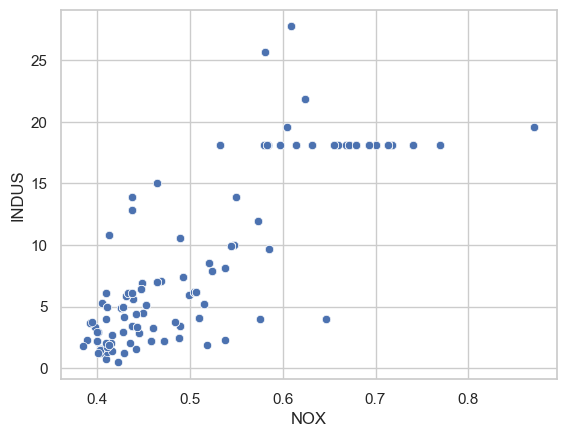

Pearson's correlation test p-value: 7.913361061233745e-98
Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


In [17]:
# Hypotheses
# H0: Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
# H1: Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

# Create a scatter plot
sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

# Display the plot
pyplot.show()

# Perform Pearson's correlation test
pearson_test = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the result of the test
print(f"Pearson's correlation test p-value: {pearson_test[1]}")

# Interpret the result
if pearson_test[1] < 0.05:
    print("Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("Since the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that there is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")

In [18]:
# Hypotheses
# H0: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
# H1: There is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

# Define the dependent and independent variables
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Make predictions
predictions = model.predict(X)

# Print the summary of the model
print(model.summary())

# Interpret the result
if model.pvalues[1] < 0.05:
    print("Since the p-value is less than the alpha level 0.05, we reject the null hypothesis as there is evidence that there is a difference.")
else:
    print("Since the p-value is greater than the alpha level 0.05, we fail to reject the null hypothesis.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 02 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        10:54:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0